### 1. We have the min and max temperatures in a city In India for each months of the year. We would like to find a function to describe this and show it graphically, the dataset given below.



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit
%matplotlib inline

In [2]:
Max = [39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25]
Min = [21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18]

df = pd.DataFrame()
df['Max'] = Max
df['Min'] = Min
df['Month'] = range(1,13)

In [3]:
df

,Max,Min,Month
0,39,21,1
1,41,23,2
2,43,27,3
3,47,28,4
4,49,32,5
5,51,35,6
6,45,31,7
7,38,28,8
8,37,21,9
9,29,19,10


<Figure size 432x288 with 0 Axes>

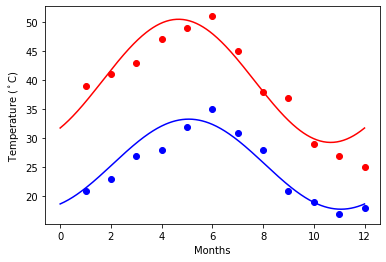

In [4]:
month = np.arange(12)

from scipy import optimize

def yearly_temps(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 2 * np.pi /times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, month,df.Max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, month,df.Min, [-40, 20, 0])
days = np.linspace(0, 12, num=365)
plt.figure()

fig , ax =plt.subplots()
plt.plot(df.Month, df.Max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(df.Month, df.Min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')

plt.ylabel('Temperature ($^\circ$C)')
plt.xlabel('Months')

plt.show()

## 2.
* Create a pie chart presenting the male/female proportion
* Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [5]:
url= 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
df = pd.read_csv(url)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


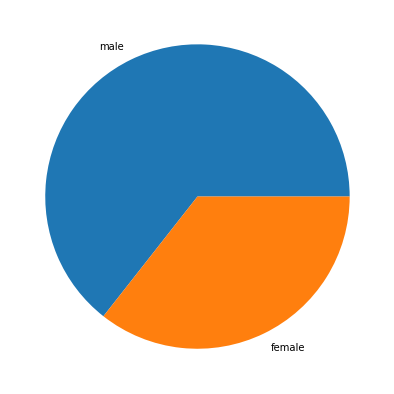

In [6]:
# Creating plot 
p = df.sex.value_counts()

fig = plt.figure(figsize =(10, 7)) 
plt.pie(p, labels=['male', 'female']) 
  
# show plot 
plt.show()

<AxesSubplot:xlabel='age', ylabel='fare'>

<Figure size 432x288 with 0 Axes>

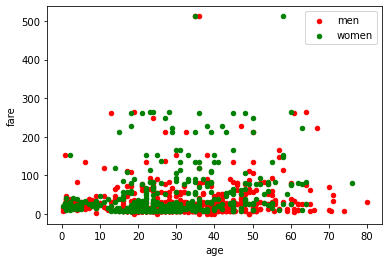

In [8]:
plt.figure()
c1 =df[df.sex=='male'].plot.scatter(x='age', y='fare', c='red', label='men')
df[df.sex=='female'].plot.scatter(x='age', y='fare', c='green', ax=c1, label='women')
